# Correlation Analysis Overview

This document outlines the analysis of **autocorrelation**, **cross-correlation**, and **Pearson correlation** in the dataset.

## Initial Analysis
We begin by examining the **Pearson correlation** to gain insights after an initial exploration of the data.

In [1]:
import pandas as pd
from IPython.display import display

df = pd.read_csv("weather_data.csv", parse_dates=["Date/Time"])

df["hour"] = df["Date/Time"].dt.hour
df["minute"] = df["Date/Time"].dt.minute
print(display(df.head(1)))
print(df.columns)

C:\Users\juliu\AppData\Local\Temp\ipykernel_26940\951412397.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("weather_data.csv", parse_dates=["Date/Time"])


,Date/Time,PV3_C1_AI_P,WEATHER_STATION_AI_CONTROLWEB_BackofModuleTemperature1,WEATHER_STATION_AI_CONTROLWEB_BackofModuleTemperature2,WEATHER_STATION_AI_MGATE_AmbientTemperature,WEATHER_STATION_AI_MGATE_AmbientTemperaturewithOffset,WEATHER_STATION_AI_MGATE_DewpointValue,WEATHER_STATION_AI_MGATE_Humidity,WEATHER_STATION_AI_MGATE_HumidityOffset,WEATHER_STATION_AI_MGATE_HumiditywithOffset,WEATHER_STATION_AI_MGATE_Pyranometer1BodyTemperature,WEATHER_STATION_AI_MGATE_Pyranometer2BodyTemperature,WEATHER_STATION_AI_MGATE_SolarIrradiancePyranometer1,WEATHER_STATION_AI_MGATE_SolarIrradiancePyranometer2,WEATHER_STATION_AI_MGATE_TemperatureOffset,WEATHER_STATION_AI_MGATE_WindDirection,WEATHER_STATION_AI_MGATE_WindDirection_Out,WEATHER_STATION_AI_MGATE_WindSpeed,hour,minute
0,2025-05-04 23:40:01,0.0,39.625,2.6875,9.7,9.7,3.5,65.300003,0,65.300003,7.98,8.059999,-1.53,-1.47,0,331.700012,15,0.0,23,40


None
Index(['Date/Time', 'PV3_C1_AI_P',
       'WEATHER_STATION_AI_CONTROLWEB_BackofModuleTemperature1',
       'WEATHER_STATION_AI_CONTROLWEB_BackofModuleTemperature2',
       'WEATHER_STATION_AI_MGATE_AmbientTemperature',
       'WEATHER_STATION_AI_MGATE_AmbientTemperaturewithOffset',
       'WEATHER_STATION_AI_MGATE_DewpointValue',
       'WEATHER_STATION_AI_MGATE_Humidity',
       'WEATHER_STATION_AI_MGATE_HumidityOffset',
       'WEATHER_STATION_AI_MGATE_HumiditywithOffset',
       'WEATHER_STATION_AI_MGATE_Pyranometer1BodyTemperature',
       'WEATHER_STATION_AI_MGATE_Pyranometer2BodyTemperature',
       'WEATHER_STATION_AI_MGATE_SolarIrradiancePyranometer1',
       'WEATHER_STATION_AI_MGATE_SolarIrradiancePyranometer2',
       'WEATHER_STATION_AI_MGATE_TemperatureOffset',
       'WEATHER_STATION_AI_MGATE_WindDirection',
       'WEATHER_STATION_AI_MGATE_WindDirection_Out',
       'WEATHER_STATION_AI_MGATE_WindSpeed', 'hour', 'minute'],
      dtype='object')


Overall Pearson correlation between power and SolarIrradiancePyranometer1: 0.992, p-value: 0.000e+00
The overall correlation is statistically significant.


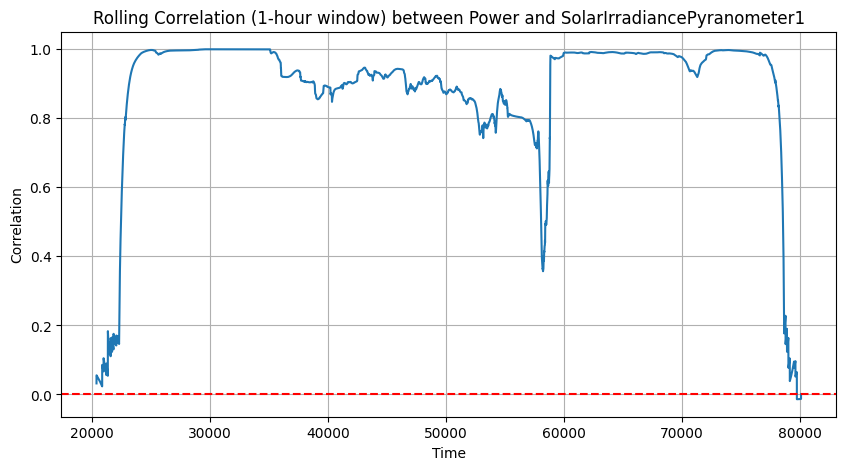

There are 1991 time points where the correlation is insignificant (|corr| < 0.1).
There are 35 time points where both power and SolarIrradiancePyranometer1 are zero (likely night).


In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Overall Pearson correlation
overall_corr, p_value = stats.pearsonr(df['PV3_C1_AI_P'], df['WEATHER_STATION_AI_MGATE_SolarIrradiancePyranometer1'])
print(f"Overall Pearson correlation between power and SolarIrradiancePyranometer1: {overall_corr:.3f}, p-value: {p_value:.3e}")
if p_value < 0.05:
    print("The overall correlation is statistically significant.")
else:
    print("The overall correlation is not statistically significant.")

# Rolling correlation (1-hour window = 3600 seconds)
window_size = 3600
rolling_corr = df['PV3_C1_AI_P'].rolling(window=window_size).corr(df['WEATHER_STATION_AI_MGATE_SolarIrradiancePyranometer1'])

# Plot rolling correlation
plt.figure(figsize=(10, 5))
rolling_corr.plot()
plt.title('Rolling Correlation (1-hour window) between Power and SolarIrradiancePyranometer1')
plt.xlabel('Time')
plt.ylabel('Correlation')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

# Identify periods where correlation is not significant
# For simplicity, consider correlation insignificant if |corr| < 0.1 (adjust threshold as needed)
insignificant_periods = rolling_corr[np.abs(rolling_corr) < 0.1]
if not insignificant_periods.empty:
    print(f"There are {len(insignificant_periods)} time points where the correlation is insignificant (|corr| < 0.1).")
else:
    print("There are no time points where the correlation is insignificant (|corr| < 0.1).")

# Optional: Check for periods where both features are zero (e.g., at night)
zero_both = df[(df['PV3_C1_AI_P'] == 0) & (df['WEATHER_STATION_AI_MGATE_SolarIrradiancePyranometer1'] == 0)]
if not zero_both.empty:
    print(f"There are {len(zero_both)} time points where both power and SolarIrradiancePyranometer1 are zero (likely night).")

## Autocorrelation

Next we show that there is significant **autocorrealtion** within both features

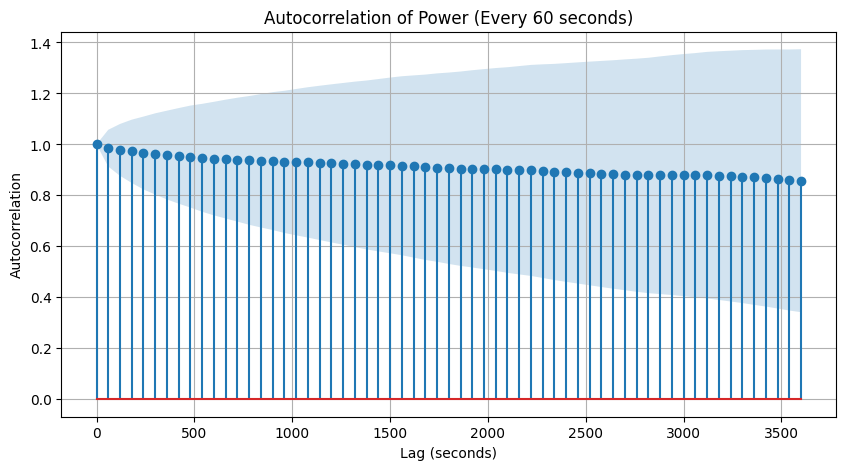

Power has 0 statistically significant lags (outside 95% CI).
Power has 61 practically significant lags (|ACF| > 0.5).


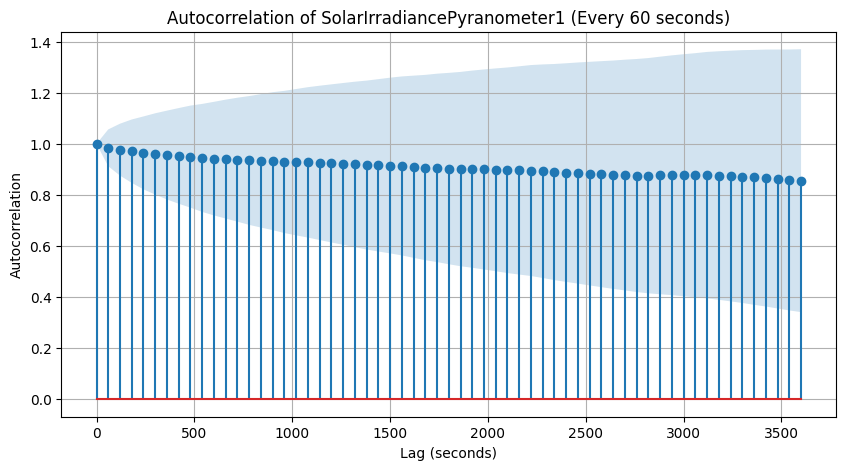

SolarIrradiancePyranometer1 has 0 statistically significant lags (outside 95% CI).
SolarIrradiancePyranometer1 has 61 practically significant lags (|ACF| > 0.5).


In [3]:
from statsmodels.tsa.stattools import acf

def compute_autocorrelation(series, lag_interval=60, max_lag=14400, title=''):
    # Compute ACF for all lags up to max_lag
    acf_vals, confint = acf(series, nlags=max_lag, fft=True, alpha=0.05)

    # Subsample lags (every lag_interval seconds)
    lags = np.arange(0, max_lag + 1, lag_interval)
    acf_vals_sub = acf_vals[::lag_interval]
    confint_sub = confint[::lag_interval]
    
    # Matplotlib Plot for quick visualization
    plt.figure(figsize=(10, 5))
    plt.stem(lags, acf_vals_sub)
    plt.fill_between(lags, confint_sub[:, 0], confint_sub[:, 1], alpha=0.2)
    plt.title(f'Autocorrelation of {title} (Every {lag_interval} seconds)')
    plt.xlabel('Lag (seconds)')
    plt.ylabel('Autocorrelation')
    plt.grid(True)
    plt.show()
    
    # Check significant lags
    # significant_lags = np.where((acf_vals_sub > confint_sub[:, 1]) | (acf_vals_sub < confint_sub[:, 0]))[0]
    significant_lags = np.where((acf_vals_sub > confint_sub[:, 1]) | (acf_vals_sub < confint_sub[:, 0]))[0]
    practical_lags = np.where(np.abs(acf_vals_sub) > 0.5)[0]
    print(f"{title} has {len(significant_lags)} statistically significant lags (outside 95% CI).")
    print(f"{title} has {len(practical_lags)} practically significant lags (|ACF| > 0.5).")

    return lags, acf_vals_sub, confint_sub

# Compute autocorrelation
lags_power, acf_power, confint_power = compute_autocorrelation(
    df['PV3_C1_AI_P'], lag_interval=60, max_lag=3600, title='Power'
)
lags_irradiance, acf_irradiance, confint_irradiance = compute_autocorrelation(
    df['WEATHER_STATION_AI_MGATE_SolarIrradiancePyranometer1'], lag_interval=60, max_lag=3600, title='SolarIrradiancePyranometer1'
)

## Cross Correlation

To see whether Solar Irradiance has an impact on future power output we calculate the **ccf**.


Power vs SolarIrradiancePyranometer1 Cross-Correlation (Power vs Lagged SolarIrradiancePyranometer1):
Lag 0 seconds: CCF = 0.992, CI = [-0.007, 0.007]
Lag 5 seconds: CCF = 0.994, CI = [-0.007, 0.007]
Lag 10 seconds: CCF = 0.996, CI = [-0.007, 0.007]
Lag 15 seconds: CCF = 0.998, CI = [-0.007, 0.007]
Lag 20 seconds: CCF = 0.997, CI = [-0.007, 0.007]
Lag 25 seconds: CCF = 0.994, CI = [-0.007, 0.007]
Lag 30 seconds: CCF = 0.992, CI = [-0.007, 0.007]
Lag 35 seconds: CCF = 0.991, CI = [-0.007, 0.007]
Lag 40 seconds: CCF = 0.990, CI = [-0.007, 0.007]
Lag 45 seconds: CCF = 0.989, CI = [-0.007, 0.007]
Lag 50 seconds: CCF = 0.988, CI = [-0.007, 0.007]


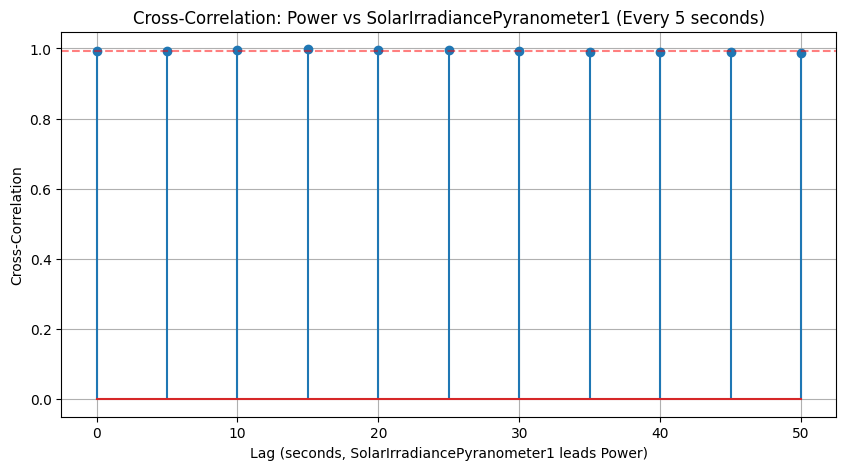

Power vs SolarIrradiancePyranometer1 has 11 statistically significant lags (|CCF| > 0.007).


In [4]:
from statsmodels.tsa.stattools import ccf

def compute_cross_correlation(series1, series2, lag_interval=60, max_lag=3600, title=''):

    ccf_vals = ccf(series1, series2, adjusted=True)[:max_lag + 1]
    
    if len(series1) >= 30:
    # Approximate 95% confidence interval
        ci = 1.96 / np.sqrt(len(series1))
    else:
        ci = 0.07

    lags = np.arange(0, max_lag + 1, lag_interval)
    ccf_vals_sub = ccf_vals[::lag_interval]
    
    # Print CCF at key lags
    print(f"\n{title} Cross-Correlation (Power vs Lagged SolarIrradiancePyranometer1):")
    for lag, ccf_val in zip(lags, ccf_vals_sub):
        print(f"Lag {lag} seconds: CCF = {ccf_val:.3f}, CI = [{-ci:.3f}, {ci:.3f}]")
    
    # Matplotlib Plot
    plt.figure(figsize=(10, 5))
    plt.stem(lags, ccf_vals_sub)
    # plt.axhline(y=ci, color='r', linestyle='--', alpha=0.5)
    plt.axhline(y=1-ci, color='r', linestyle='--', alpha=0.5)
    plt.title(f'Cross-Correlation: {title} (Every {lag_interval} seconds)')
    plt.xlabel('Lag (seconds, SolarIrradiancePyranometer1 leads Power)')
    plt.ylabel('Cross-Correlation')
    plt.grid(True)
    plt.show()
    
    # Check significant lags
    significant_lags = np.where(np.abs(ccf_vals_sub) > ci)[0]
    print(f"{title} has {len(significant_lags)} statistically significant lags (|CCF| > {ci:.3f}).")
    
    return lags, ccf_vals_sub, ci


lags_ccf, ccf_vals, ci = compute_cross_correlation(
    df['PV3_C1_AI_P'], df['WEATHER_STATION_AI_MGATE_SolarIrradiancePyranometer1'],
    lag_interval=5, max_lag=50, title='Power vs SolarIrradiancePyranometer1'
)


c:\Users\juliu\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1179: RuntimeWarning: invalid value encountered in divide
  ret = cvf / (np.std(x) * np.std(y))


,interval_start,interval_end,max_corr_lag_sec,max_corr_value,n_points,interval_label
0,0,7200,1,NaN,7200,00:00-02:00
1,7200,14400,1,NaN,7200,02:00-04:00
2,14400,21600,13,0.133202,7200,04:00-06:00
3,21600,28800,1,0.998091,7200,06:00-08:00
4,28800,36000,13,0.985682,7200,08:00-10:00
5,36000,43200,16,0.997092,7200,10:00-12:00
6,43200,50400,16,0.985522,7200,12:00-14:00
7,50400,57600,16,0.987048,7200,14:00-16:00
8,57600,64800,1,0.997111,7200,16:00-18:00
9,64800,72000,1,0.992275,7200,18:00-20:00


None


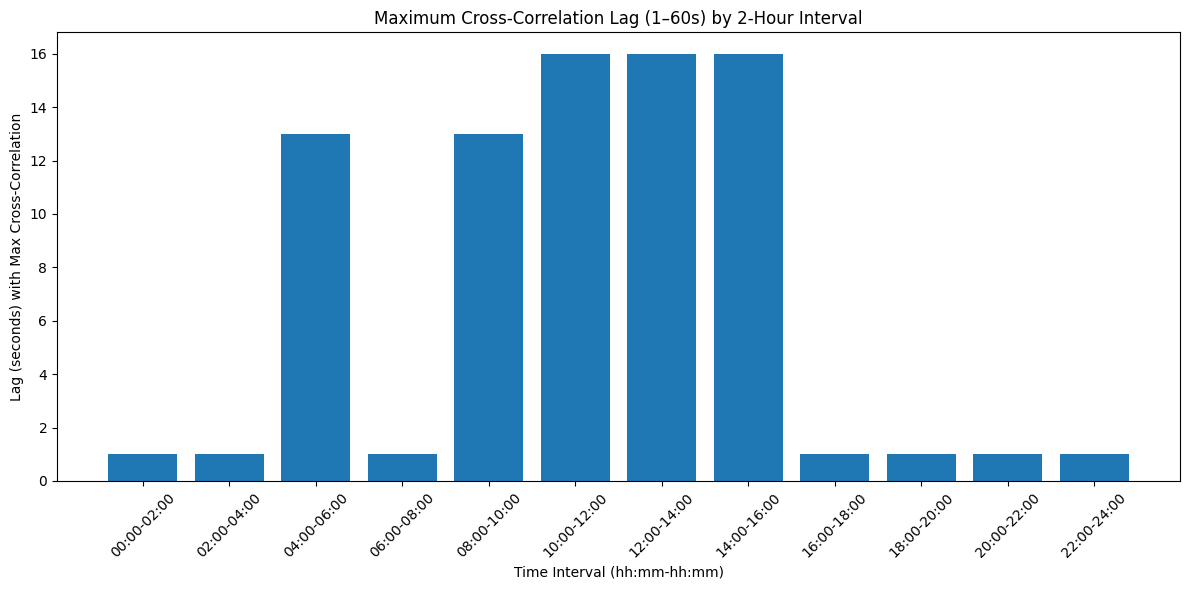

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import ccf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

def compute_max_lag_ccf(x, y, min_lag=1, max_lag=60):
    # Drop NaNs and standardize
    valid = x.notna() & y.notna()
    x = x[valid]
    y = y[valid]
    if len(x) <= max_lag:
        return None, None

    ccf_vals = ccf(x, y, adjusted=True, fft=True)
    lags = np.arange(len(ccf_vals))
    # Only consider lags between min_lag and max_lag
    lags_range = lags[min_lag:max_lag+1]
    ccf_range = ccf_vals[min_lag:max_lag+1]
    if len(ccf_range) == 0:
        return None, None
    idx = np.argmax(np.abs(ccf_range))
    lag = lags_range[idx]
    value = ccf_range[idx]
    return lag, value

results = []
interval = 2 * 3600

for start in range(0, 86400, interval):
    end = start + interval
    mask = (df.index >= start) & (df.index < end)
    chunk = df.loc[mask]
    if len(chunk) < 120:
        continue
    lag, corr = compute_max_lag_ccf(
        chunk['PV3_C1_AI_P'],
        chunk['WEATHER_STATION_AI_MGATE_SolarIrradiancePyranometer1'],
        min_lag=1,
        max_lag=60
    )
    results.append({
        'interval_start': start,
        'interval_end': end,
        'max_corr_lag_sec': lag,
        'max_corr_value': corr,
        'n_points': len(chunk)
    })

lag_df = pd.DataFrame(results)
lag_df['interval_label'] = lag_df.apply(
    lambda row: f"{int(row['interval_start']//3600):02d}:00-{int(row['interval_end']//3600):02d}:00", axis=1
)
print(display(lag_df))

plt.figure(figsize=(12, 6))
plt.bar(lag_df['interval_label'], lag_df['max_corr_lag_sec'])
plt.xticks(rotation=45)
plt.xlabel('Time Interval (hh:mm-hh:mm)')
plt.ylabel('Lag (seconds) with Max Cross-Correlation')
plt.title('Maximum Cross-Correlation Lag (1–60s) by 2-Hour Interval')
plt.tight_layout()
plt.show()


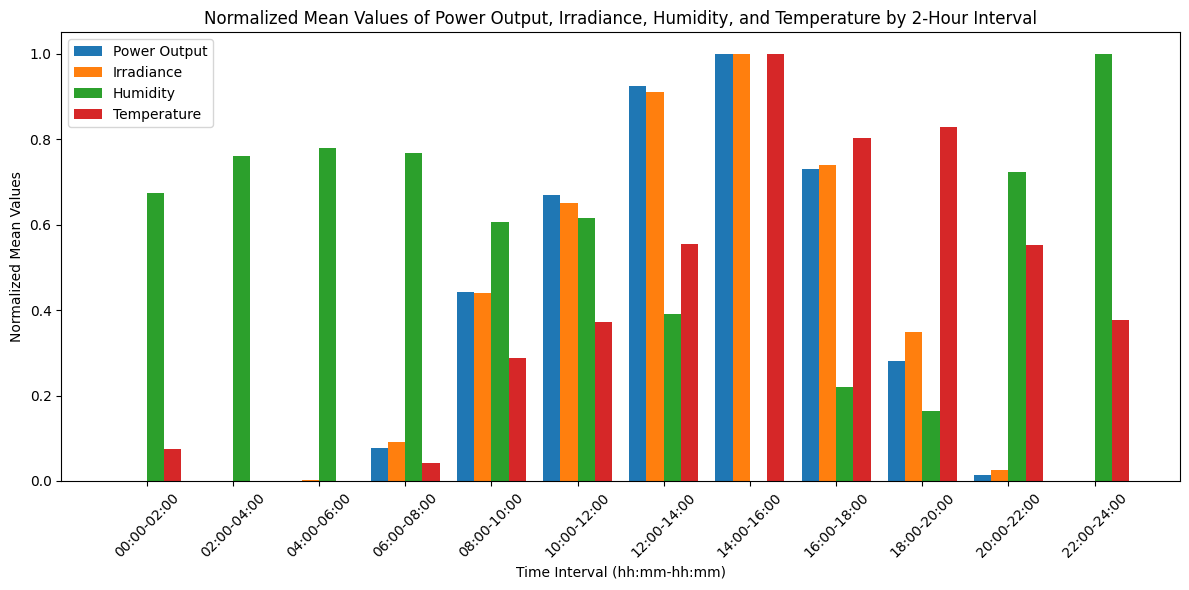

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

interval = 2 * 3600  # 2 hours in seconds

means_list = []

for start in range(0, 86400, interval):
    end = start + interval
    mask = (df.index >= start) & (df.index < end)
    chunk = df.loc[mask]
    if len(chunk) < 120:  # Skip intervals with insufficient data
        continue
    mean_power = chunk['PV3_C1_AI_P'].mean()
    mean_irradiance = chunk['WEATHER_STATION_AI_MGATE_SolarIrradiancePyranometer1'].mean()
    mean_humidity = chunk['WEATHER_STATION_AI_MGATE_Humidity'].mean()
    mean_temperature = chunk['WEATHER_STATION_AI_MGATE_AmbientTemperature'].mean()
    interval_label = f"{int(start//3600):02d}:00-{int(end//3600):02d}:00"
    means_list.append({
        'interval_label': interval_label,
        'mean_power': mean_power,
        'mean_irradiance': mean_irradiance,
        'mean_humidity': mean_humidity,
        'mean_temperature': mean_temperature
    })

means_df = pd.DataFrame(means_list)

# Normalize each variable to [0, 1] using min-max normalization
for col in ['mean_power', 'mean_irradiance', 'mean_humidity', 'mean_temperature']:
    min_val = means_df[col].min()
    max_val = means_df[col].max()
    means_df[f'normalized_{col}'] = (means_df[col] - min_val) / (max_val - min_val)

# Plot the normalized means
plt.figure(figsize=(12, 6))
bar_width = 0.2
intervals = means_df['interval_label']
x = range(len(intervals))

plt.bar(x, means_df['normalized_mean_power'], width=bar_width, label='Power Output')
plt.bar([i + bar_width for i in x], means_df['normalized_mean_irradiance'], width=bar_width, label='Irradiance')
plt.bar([i + 2*bar_width for i in x], means_df['normalized_mean_humidity'], width=bar_width, label='Humidity')
plt.bar([i + 3*bar_width for i in x], means_df['normalized_mean_temperature'], width=bar_width, label='Temperature')

plt.xticks([i + 1.5*bar_width for i in x], intervals, rotation=45)
plt.xlabel('Time Interval (hh:mm-hh:mm)')
plt.ylabel('Normalized Mean Values')
plt.title('Normalized Mean Values of Power Output, Irradiance, Humidity, and Temperature by 2-Hour Interval')
plt.legend()
plt.tight_layout()
plt.savefig('plots/normalized_means_plot.png')

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

interval = 7200

fig, axes = plt.subplots(4, 3, figsize=(24, 15))
fig.suptitle('Power Output and Irradiance by 2-Hour Intervals', fontsize=16)

idx = 0
for start in range(0, 86400, interval):
    end = start + interval
   
    mask = (df.index >= start) & (df.index < end)
    chunk = df.loc[mask]
    
    if chunk.empty:
        continue
    
    x = (chunk.index - start) / 60  # Seconds to minutes
    
    ax = axes.flat[idx]

    ax.plot(x, chunk['PV3_C1_AI_P'], color='blue')
    ax.set_ylabel('Power Output', color='blue')
    ax.tick_params(axis='y', labelcolor='blue')
    
    ax2 = ax.twinx()
    ax2.plot(x, chunk['WEATHER_STATION_AI_MGATE_SolarIrradiancePyranometer1'], color='red')
    ax2.set_ylabel('Irradiance (W/m²)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    interval_label = f"{int(start//3600):02d}:00-{int(end//3600):02d}:00"
    ax.set_title(interval_label)
    ax.set_xlabel('Time (minutes past interval start)')
    ax.set_xticks([0, 30, 60, 90, 120])

    idx += 1

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
fig.savefig('plots/power_irradiance_plots.png')
plt.close(fig) 